In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import re

## Merging

In [2]:
coo = pd.read_json('coo_new.json') 
csr = pd.read_json('csr_new.json') 
bsr = pd.read_json('bsr_new.json') 

parts = pd.concat([coo, csr, bsr])

cpu = parts.groupby(['testcase', 'format', 'kernelType']).max().reset_index()
cpu = cpu[cpu['kernelType'] == 0]
cpu = cpu[['testcase', 'format', 'cudaTotalTimeMs']]


parts.drop(columns = ['sequentialTimeMs'], inplace=True)
cpu.rename(columns={'cudaTotalTimeMs': 'sequentialTimeMs'}, inplace=True)

merged = pd.merge(parts, cpu, on=["testcase", "format"], how="left")
merged.rename(columns={'testcase': 'testCase'}, inplace=True)
merged

,testCase,sparsity,format,kernelType,denseOrdering,correct,cudaPrologTimeMs,cudaKernelTimeMs,cudaEpilogTimeMs,cudaTotalTimeMs,sequentialTimeMs
0,small_210,0.033333,COO,0,ROW_MAJOR,1,0.000,0.128,0.000,0.128,0.128
1,small_210,0.033333,COO,1,ROW_MAJOR,1,0.005,0.442,0.017,0.464,0.128
2,small_210,0.033333,COO,-1,ROW_MAJOR,1,24.421,7.463,0.002,31.886,0.128
3,small_32x32,0.095703,COO,0,ROW_MAJOR,1,0.000,0.023,0.000,0.023,0.023
4,small_32x32,0.095703,COO,1,ROW_MAJOR,1,0.003,0.433,0.015,0.451,0.023
...,...,...,...,...,...,...,...,...,...,...,...
115,large_20000,0.002757,BSR,1,ROW_MAJOR,1,24.428,312.407,414.037,750.872,176015.051
116,large_21074,0.001385,BSR,0,ROW_MAJOR,1,0.000,68571.315,0.000,68571.315,68571.315
117,large_21074,0.001385,BSR,1,ROW_MAJOR,1,0.520,2423.662,311.461,2735.643,68571.315
118,large_25605,0.000547,BSR,0,ROW_MAJOR,1,0.000,48764.435,0.000,48764.435,48764.435


In [3]:
merged.groupby(['testCase'])['sparsity'].mean()

testCase
large_15120    0.001042
large_20000    0.000827
large_21074    0.001385
large_25605    0.000547
medium_1484    0.004775
medium_2048    0.003841
medium_2880    0.004840
medium_4000    0.000822
medium_4096    0.129647
small_10x10    0.920000
small_210      0.033333
small_32x32    0.164062
Name: sparsity, dtype: float64

In [4]:
ell = pd.read_json('ell_experiments.json')
ell['cudaPrologTimeMs'] = ell['cudaPrologTimeUs'] / 1000
ell['cudaKernelTimeMs'] = ell['cudaKernelTimeUs'] / 1000
ell['cudaEpilogTimeMs'] = ell['cudaEpilogTimeUs'] / 1000
ell['cudaTotalTimeMs'] = ell['cudaTotalTimeUs'] / 1000
ell['sequentialTimeMs'] = ell['sequentialTimeUs'] / 1000
ell.drop(columns = ['cudaPrologTimeUs', 'cudaKernelTimeUs', 'cudaEpilogTimeUs', 'cudaTotalTimeUs', 'sequentialTimeUs'], inplace=True)
ell.rename(columns={'allclose': 'correct', }, inplace=True)
ell

,format,testCase,denseOrdering,sparsity,kernelType,correct,cudaPrologTimeMs,cudaKernelTimeMs,cudaEpilogTimeMs,cudaTotalTimeMs,sequentialTimeMs
0,ELL,small_10x10,ROW_MAJOR,0.90,1,1,0.178,0.281,0.019,0.478,0.010
1,ELL,small_10x10,ROW_MAJOR,0.90,2,1,0.061,0.036,0.014,0.112,0.010
2,ELL,small_10x10,COL_MAJOR,0.90,1,1,0.042,0.017,0.013,0.073,0.009
3,ELL,small_10x10,COL_MAJOR,0.90,2,1,0.043,0.021,0.012,0.078,0.009
4,ELL,small_32x32,ROW_MAJOR,0.10,1,1,0.188,0.287,0.020,0.496,0.026
5,ELL,small_32x32,ROW_MAJOR,0.10,2,1,0.062,0.044,0.014,0.121,0.026
6,ELL,small_32x32,COL_MAJOR,0.10,1,1,0.043,0.021,0.012,0.078,0.026
7,ELL,small_32x32,COL_MAJOR,0.10,2,1,0.043,0.031,0.013,0.087,0.026
8,ELL,small_210,ROW_MAJOR,0.03,1,1,0.192,0.275,0.018,0.487,0.133
9,ELL,small_210,ROW_MAJOR,0.03,2,1,0.086,0.045,0.015,0.147,0.134


In [5]:
complete = pd.concat([merged, ell])
complete.drop(columns = ['sparsity',], inplace=True)
complete = complete[complete['kernelType'] != 0]
complete

,testCase,format,kernelType,denseOrdering,correct,cudaPrologTimeMs,cudaKernelTimeMs,cudaEpilogTimeMs,cudaTotalTimeMs,sequentialTimeMs
1,small_210,COO,1,ROW_MAJOR,1,0.005,0.442,0.017,0.464,0.128
2,small_210,COO,-1,ROW_MAJOR,1,24.421,7.463,0.002,31.886,0.128
4,small_32x32,COO,1,ROW_MAJOR,1,0.003,0.433,0.015,0.451,0.023
5,small_32x32,COO,-1,ROW_MAJOR,1,24.510,7.456,0.002,31.968,0.023
7,small_10x10,COO,1,ROW_MAJOR,1,0.004,0.435,0.016,0.455,0.007
...,...,...,...,...,...,...,...,...,...,...
43,large_21074,ELL,2,COL_MAJOR,1,159.081,45272.783,295.706,45727.571,72305.498
44,large_25605,ELL,1,ROW_MAJOR,1,136.055,90.262,456.894,683.211,43800.033
45,large_25605,ELL,2,ROW_MAJOR,1,126.484,7498.655,451.385,8076.525,43867.929
46,large_25605,ELL,1,COL_MAJOR,1,126.491,91.912,440.095,658.499,49056.695


## Fix cusparse kernel and epilogue time

In [6]:
cusparse = complete[complete['kernelType'] == -1]
ours = complete[complete['kernelType'] != -1]
cusparse['cudaKernelTimeMs'] = cusparse['cudaKernelTimeMs'] + cusparse['cudaEpilogTimeMs']

epilogue = ours[ours['denseOrdering'] == 'ROW_MAJOR']
epilogue = epilogue.groupby(['testCase', 'format'])['cudaEpilogTimeMs'].mean().reset_index()
cusparse.drop(columns = ['cudaEpilogTimeMs'], inplace=True)
cusparse_new = pd.merge(cusparse, epilogue, on=['testCase', 'format'], how='left')

cusparse_new['cudaTotalTimeMs'] = cusparse_new['cudaTotalTimeMs'] + cusparse_new['cudaEpilogTimeMs'] 


complete = pd.concat([ours, cusparse_new])
complete

C:\Users\Katel\AppData\Local\Temp\ipykernel_52944\2077900871.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cusparse['cudaKernelTimeMs'] = cusparse['cudaKernelTimeMs'] + cusparse['cudaEpilogTimeMs']
C:\Users\Katel\AppData\Local\Temp\ipykernel_52944\2077900871.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cusparse.drop(columns = ['cudaEpilogTimeMs'], inplace=True)


,testCase,format,kernelType,denseOrdering,correct,cudaPrologTimeMs,cudaKernelTimeMs,cudaEpilogTimeMs,cudaTotalTimeMs,sequentialTimeMs
1,small_210,COO,1,ROW_MAJOR,1,0.005,0.442,0.0170,0.4640,0.128
4,small_32x32,COO,1,ROW_MAJOR,1,0.003,0.433,0.0150,0.4510,0.023
7,small_10x10,COO,1,ROW_MAJOR,1,0.004,0.435,0.0160,0.4550,0.007
10,medium_1484,COO,1,ROW_MAJOR,1,0.296,1.585,3.3050,5.1860,68.813
13,medium_2048,COO,1,ROW_MAJOR,1,0.341,2.527,5.6250,8.4930,145.911
...,...,...,...,...,...,...,...,...,...,...
19,medium_4096,CSR,-1,ROW_MAJOR,1,29.730,7.323,13.7340,50.7870,20864.161
20,large_15120,CSR,-1,ROW_MAJOR,1,28.018,9.023,72.7090,109.7500,1475.737
21,large_20000,CSR,-1,ROW_MAJOR,1,30.059,11.339,419.4885,460.8865,11089.846
22,large_21074,CSR,-1,ROW_MAJOR,1,30.558,14.645,343.8735,389.0765,30886.603


In [7]:
complete['speedup'] = complete['sequentialTimeMs'] / complete['cudaTotalTimeMs']
complete['computation_speedup'] = complete['sequentialTimeMs'] / complete['cudaKernelTimeMs']
complete

,testCase,format,kernelType,denseOrdering,correct,cudaPrologTimeMs,cudaKernelTimeMs,cudaEpilogTimeMs,cudaTotalTimeMs,sequentialTimeMs,speedup,computation_speedup
1,small_210,COO,1,ROW_MAJOR,1,0.005,0.442,0.0170,0.4640,0.128,0.275862,0.289593
4,small_32x32,COO,1,ROW_MAJOR,1,0.003,0.433,0.0150,0.4510,0.023,0.050998,0.053118
7,small_10x10,COO,1,ROW_MAJOR,1,0.004,0.435,0.0160,0.4550,0.007,0.015385,0.016092
10,medium_1484,COO,1,ROW_MAJOR,1,0.296,1.585,3.3050,5.1860,68.813,13.268993,43.415142
13,medium_2048,COO,1,ROW_MAJOR,1,0.341,2.527,5.6250,8.4930,145.911,17.180148,57.740799
...,...,...,...,...,...,...,...,...,...,...,...,...
19,medium_4096,CSR,-1,ROW_MAJOR,1,29.730,7.323,13.7340,50.7870,20864.161,410.816961,2849.127543
20,large_15120,CSR,-1,ROW_MAJOR,1,28.018,9.023,72.7090,109.7500,1475.737,13.446351,163.552809
21,large_20000,CSR,-1,ROW_MAJOR,1,30.059,11.339,419.4885,460.8865,11089.846,24.061989,978.026810
22,large_21074,CSR,-1,ROW_MAJOR,1,30.558,14.645,343.8735,389.0765,30886.603,79.384396,2109.020348


## Graph

In [8]:
interested_columns = ['testCase', 'format', 'cudaKernelTimeMs', 'cudaTotalTimeMs', 'sequentialTimeMs', 'computation_speedup', 'speedup']

### COO

In [9]:
coo = complete[complete['format'] == 'COO']
cusparse_coo = coo[coo['kernelType'] < 0]
coo_ours = coo[coo['kernelType'] > 0]

coo_ours[interested_columns]


,testCase,format,cudaKernelTimeMs,cudaTotalTimeMs,sequentialTimeMs,computation_speedup,speedup
1,small_210,COO,0.442,0.464,0.128,0.289593,0.275862
4,small_32x32,COO,0.433,0.451,0.023,0.053118,0.050998
7,small_10x10,COO,0.435,0.455,0.007,0.016092,0.015385
10,medium_1484,COO,1.585,5.186,68.813,43.415142,13.268993
13,medium_2048,COO,2.527,8.493,145.911,57.740799,17.180148
16,medium_2880,COO,4.161,15.394,401.393,96.465513,26.074639
19,medium_4000,COO,6.142,25.213,248.580,40.472159,9.859200
22,medium_4096,COO,69.011,81.030,27113.978,392.893568,334.616537
25,large_15120,COO,11.135,80.269,2733.487,245.486035,34.054081
28,large_20000,COO,58.625,477.886,19546.453,333.414977,40.901916


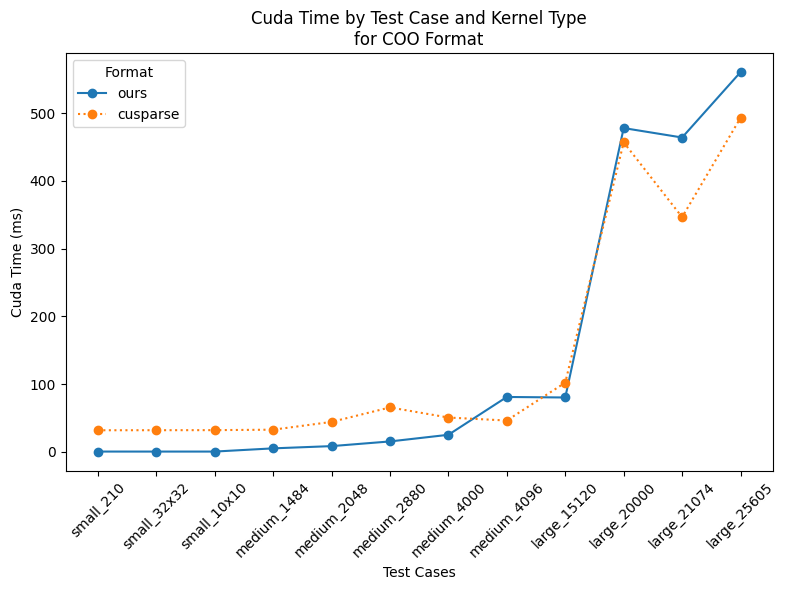

In [10]:
plt.figure(figsize=(8, 6))

subset = coo_ours[coo_ours["kernelType"] == 1]
plt.plot(subset["testCase"], subset["cudaTotalTimeMs"], marker="o", label='ours')

subset = cusparse_coo[cusparse_coo["kernelType"] == -1]
plt.plot(subset["testCase"], subset["cudaTotalTimeMs"], marker="o", label=f'cusparse', ls=':')

# Customize plot
plt.xlabel("Test Cases")
plt.ylabel("Cuda Time (ms)")
plt.title("Cuda Time by Test Case and Kernel Type\nfor COO Format")
plt.legend(title="Format")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("coo_ours_vs_advanced.png")

# Show plot
plt.show()

### CSR

In [11]:
csr = complete[complete['format'] == 'CSR']

basic = csr[csr['kernelType'] == 1]
basic[interested_columns]


,testCase,format,cudaKernelTimeMs,cudaTotalTimeMs,sequentialTimeMs,computation_speedup,speedup
37,small_210,CSR,0.461,0.484,0.067,0.145336,0.138430
42,small_32x32,CSR,0.457,0.477,0.016,0.035011,0.033543
47,small_10x10,CSR,0.483,0.507,0.004,0.008282,0.007890
52,medium_1484,CSR,0.491,3.657,38.894,79.213849,10.635494
57,medium_2048,CSR,0.982,21.033,83.455,84.984725,3.967812
62,medium_2880,CSR,0.514,12.489,216.062,420.354086,17.300184
67,medium_4000,CSR,0.605,20.300,191.754,316.948760,9.446010
72,medium_4096,CSR,3.337,19.560,20864.161,6252.370692,1066.674898
77,large_15120,CSR,1.189,71.508,1475.737,1241.158116,20.637369
82,large_20000,CSR,4.902,414.142,11089.846,2262.310486,26.777883


<Figure size 800x600 with 0 Axes>

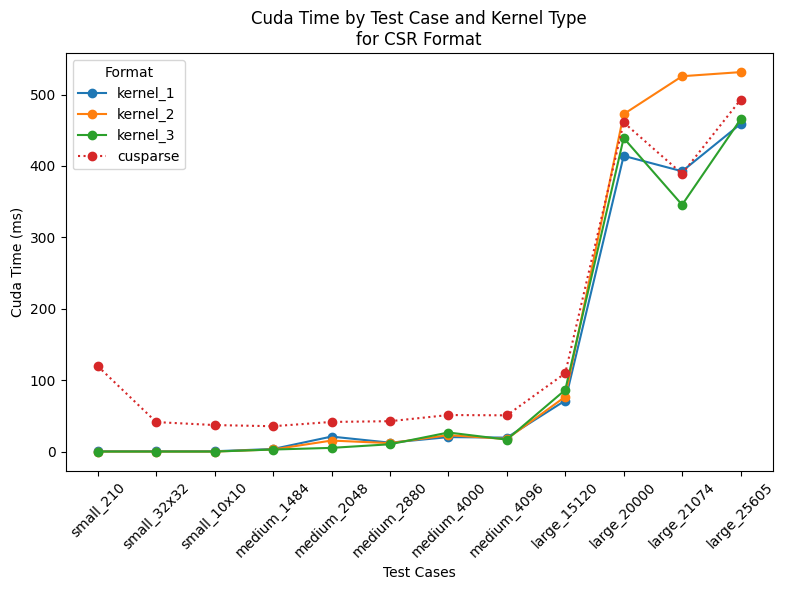

In [12]:
plt.figure(figsize=(8, 6))

plt.figure(figsize=(8, 6))
for fmt in csr["kernelType"].unique():
    subset = csr[csr["kernelType"] == fmt]
    
    if fmt == -1:
        plt.plot(subset["testCase"], subset["cudaTotalTimeMs"], marker="o", label=f'cusparse', ls=':')
    else:
        plt.plot(subset["testCase"], subset["cudaTotalTimeMs"], marker="o", label=f'kernel_{fmt}')


#plt.plot(subset["testCase"], subset["sequentialTimeMs"], marker="o", label=f'sequential')
# Customize plot
plt.xlabel("Test Cases")
plt.ylabel("Cuda Time (ms)")
plt.title("Cuda Time by Test Case and Kernel Type\nfor CSR Format")
plt.legend(title="Format")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("csr_ours_vs_advanced.png")

# Show plot
plt.show()

### BSR

In [13]:
bsr = complete[complete['format'] == 'BSR']

basic = bsr[bsr['kernelType'] == 1]
basic[interested_columns]
bsr

,testCase,format,kernelType,denseOrdering,correct,cudaPrologTimeMs,cudaKernelTimeMs,cudaEpilogTimeMs,cudaTotalTimeMs,sequentialTimeMs,speedup,computation_speedup
97,small_210,BSR,1,ROW_MAJOR,1,0.004,0.443,0.018,0.465,0.145,0.311828,0.327314
99,small_32x32,BSR,1,ROW_MAJOR,1,0.003,0.451,0.015,0.469,0.114,0.243070,0.252772
101,small_10x10,BSR,1,ROW_MAJOR,1,0.003,0.445,0.018,0.466,0.009,0.019313,0.020225
103,medium_1484,BSR,1,ROW_MAJOR,1,2.321,2.263,2.879,7.463,331.596,44.431998,146.529386
105,medium_2048,BSR,1,ROW_MAJOR,1,0.347,1.990,5.528,7.865,656.351,83.452130,329.824623
107,medium_2880,BSR,1,ROW_MAJOR,1,0.484,7.693,10.770,18.947,2821.870,148.934924,366.810087
109,medium_4000,BSR,1,ROW_MAJOR,1,4.846,9.155,20.148,34.149,976.608,28.598436,106.674823
111,medium_4096,BSR,1,ROW_MAJOR,1,0.460,188.113,12.481,201.054,83883.636,417.219434,445.921526
113,large_15120,BSR,1,ROW_MAJOR,1,0.499,50.037,67.090,117.626,27722.060,235.679697,554.031217
115,large_20000,BSR,1,ROW_MAJOR,1,24.428,312.407,414.037,750.872,176015.051,234.414189,563.415836


<Figure size 800x600 with 0 Axes>

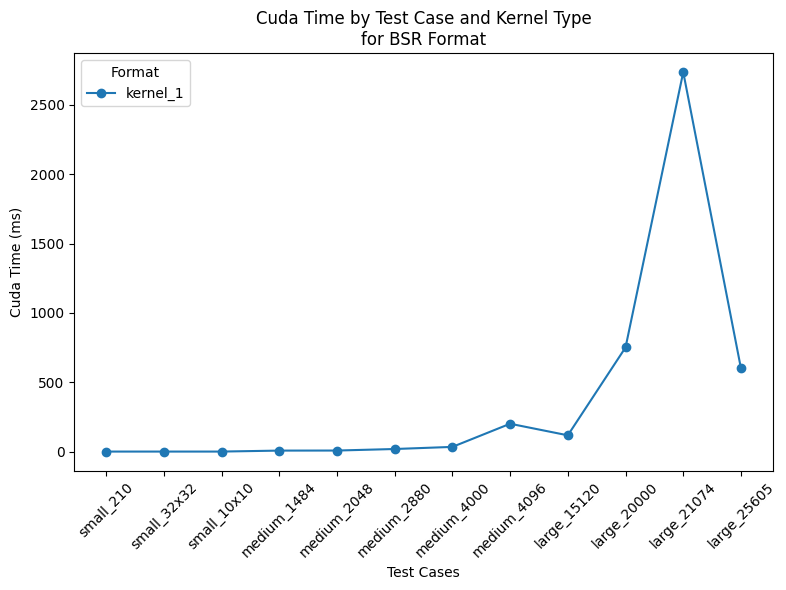

In [14]:
plt.figure(figsize=(8, 6))

plt.figure(figsize=(8, 6))
for fmt in bsr["kernelType"].unique():
    subset = bsr[bsr["kernelType"] == fmt]
    
    if fmt == -1:
        plt.plot(subset["testCase"], subset["cudaTotalTimeMs"], marker="o", label=f'cusparse', ls=':')
    else:
        plt.plot(subset["testCase"], subset["cudaTotalTimeMs"], marker="o", label=f'kernel_{fmt}')


#plt.plot(subset["testCase"], subset["sequentialTimeMs"], marker="o", label=f'sequential')
# Customize plot
plt.xlabel("Test Cases")
plt.ylabel("Cuda Time (ms)")
plt.title("Cuda Time by Test Case and Kernel Type\nfor BSR Format")
plt.legend(title="Format")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("bsr_ours_vs_advanced.png")

# Show plot
plt.show()

### ELL

In [15]:
ell = complete[complete['format'] == 'ELL']

basic = ell[(ell['kernelType'] == 1) & (ell['denseOrdering'] == 'ROW_MAJOR')]
basic #[interested_columns]
coo_ours

,testCase,format,kernelType,denseOrdering,correct,cudaPrologTimeMs,cudaKernelTimeMs,cudaEpilogTimeMs,cudaTotalTimeMs,sequentialTimeMs,speedup,computation_speedup
1,small_210,COO,1,ROW_MAJOR,1,0.005,0.442,0.017,0.464,0.128,0.275862,0.289593
4,small_32x32,COO,1,ROW_MAJOR,1,0.003,0.433,0.015,0.451,0.023,0.050998,0.053118
7,small_10x10,COO,1,ROW_MAJOR,1,0.004,0.435,0.016,0.455,0.007,0.015385,0.016092
10,medium_1484,COO,1,ROW_MAJOR,1,0.296,1.585,3.305,5.186,68.813,13.268993,43.415142
13,medium_2048,COO,1,ROW_MAJOR,1,0.341,2.527,5.625,8.493,145.911,17.180148,57.740799
16,medium_2880,COO,1,ROW_MAJOR,1,0.341,4.161,10.892,15.394,401.393,26.074639,96.465513
19,medium_4000,COO,1,ROW_MAJOR,1,0.330,6.142,18.741,25.213,248.580,9.859200,40.472159
22,medium_4096,COO,1,ROW_MAJOR,1,0.444,69.011,11.575,81.030,27113.978,334.616537,392.893568
25,large_15120,COO,1,ROW_MAJOR,1,0.346,11.135,68.788,80.269,2733.487,34.054081,245.486035
28,large_20000,COO,1,ROW_MAJOR,1,0.520,58.625,418.741,477.886,19546.453,40.901916,333.414977


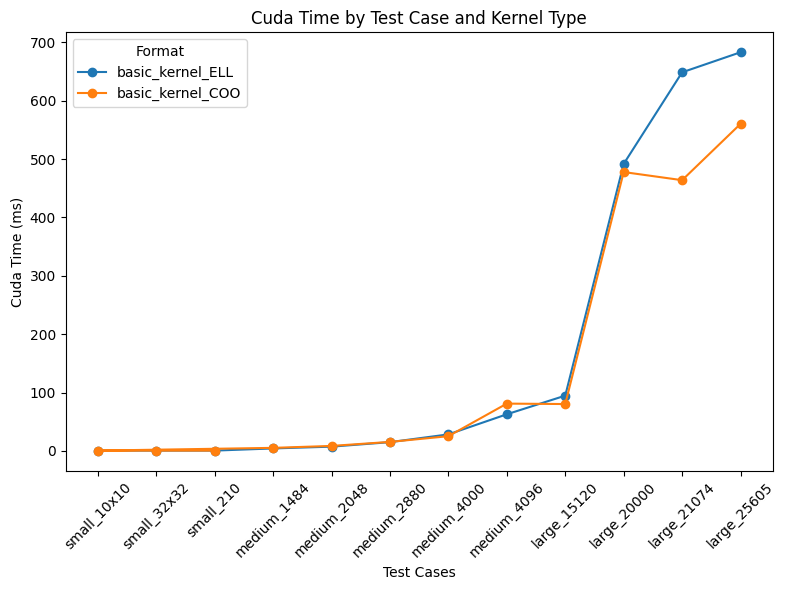

In [29]:
ell_coo_comparison = pd.concat([basic, coo_ours])



plt.figure(figsize=(8, 6))
for fmt in ell_coo_comparison["format"].unique():
    subset = ell_coo_comparison[ell_coo_comparison["format"] == fmt]
    plt.plot(subset["testCase"], subset["cudaTotalTimeMs"], marker="o", label=f'basic_kernel_{fmt}')


#plt.plot(subset["testCase"], subset["sequentialTimeMs"], marker="o", label=f'sequential')
# Customize plot
plt.xlabel("Test Cases")
plt.ylabel("Cuda Time (ms)")
plt.title("Cuda Time by Test Case and Kernel Type")
plt.legend(title="Format")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("ell_csr_comparison.png")

# Show plot
plt.show()

C:\Users\Katel\AppData\Local\Temp\ipykernel_52944\1738728463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['line'] = temp1['kernelType'].astype(str) + "-" + temp1['denseOrdering']


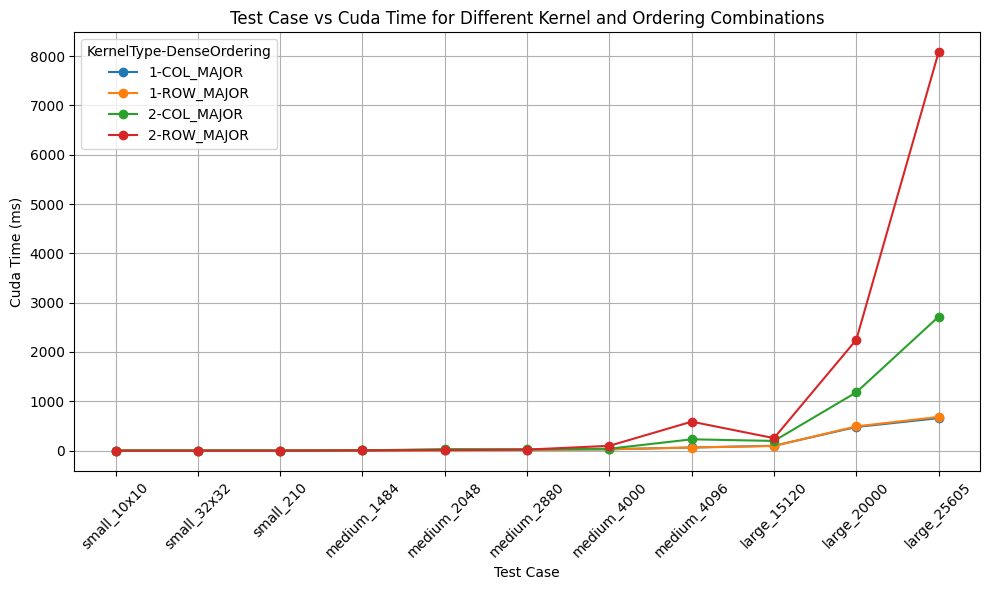

In [17]:
temp1 = complete[complete['format'] == 'ELL']
temp1['line'] = temp1['kernelType'].astype(str) + "-" + temp1['denseOrdering']
temp1 = temp1[~temp1['testCase'].isin(['large_21074'])]

grouped = temp1.groupby(['kernelType', 'denseOrdering'])

# Plot each group
plt.figure(figsize=(10, 6))
for (kernel, ordering), group in grouped:
    plt.plot(group['testCase'], group['cudaTotalTimeMs'], marker='o', label=f"{kernel}-{ordering}")

# Add labels and title
plt.xlabel('Test Case')
plt.ylabel('Cuda Time (ms)')
plt.title('Test Case vs Cuda Time for Different Kernel and Ordering Combinations')
plt.legend(title='KernelType-DenseOrdering')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("ell_basic_advanced_comparison.png")
plt.show()
# Show plot
plt.show()

### Get the best kernel for each to graph speedup


In [18]:
cusparse = complete[complete['kernelType'] == -1]
ours = complete[complete['kernelType'] != -1]
coo = ours[ours['format'] == 'COO']
csr = ours[ours['format'] == 'CSR']
csr = csr[csr['kernelType'] == 1]
bsr = ours[ours['format'] == 'BSR']
ell = ours[ours['format'] == 'ELL']
ell = ell[(ell['denseOrdering'] == 'COL_MAJOR') & (ell['kernelType'] == 1)]

our_bests = pd.concat([coo, csr, bsr, ell])
our_bests

,testCase,format,kernelType,denseOrdering,correct,cudaPrologTimeMs,cudaKernelTimeMs,cudaEpilogTimeMs,cudaTotalTimeMs,sequentialTimeMs,speedup,computation_speedup
1,small_210,COO,1,ROW_MAJOR,1,0.005,0.442,0.017,0.464,0.128,0.275862,0.289593
4,small_32x32,COO,1,ROW_MAJOR,1,0.003,0.433,0.015,0.451,0.023,0.050998,0.053118
7,small_10x10,COO,1,ROW_MAJOR,1,0.004,0.435,0.016,0.455,0.007,0.015385,0.016092
10,medium_1484,COO,1,ROW_MAJOR,1,0.296,1.585,3.305,5.186,68.813,13.268993,43.415142
13,medium_2048,COO,1,ROW_MAJOR,1,0.341,2.527,5.625,8.493,145.911,17.180148,57.740799
16,medium_2880,COO,1,ROW_MAJOR,1,0.341,4.161,10.892,15.394,401.393,26.074639,96.465513
19,medium_4000,COO,1,ROW_MAJOR,1,0.330,6.142,18.741,25.213,248.580,9.859200,40.472159
22,medium_4096,COO,1,ROW_MAJOR,1,0.444,69.011,11.575,81.030,27113.978,334.616537,392.893568
25,large_15120,COO,1,ROW_MAJOR,1,0.346,11.135,68.788,80.269,2733.487,34.054081,245.486035
28,large_20000,COO,1,ROW_MAJOR,1,0.520,58.625,418.741,477.886,19546.453,40.901916,333.414977


### Speedup

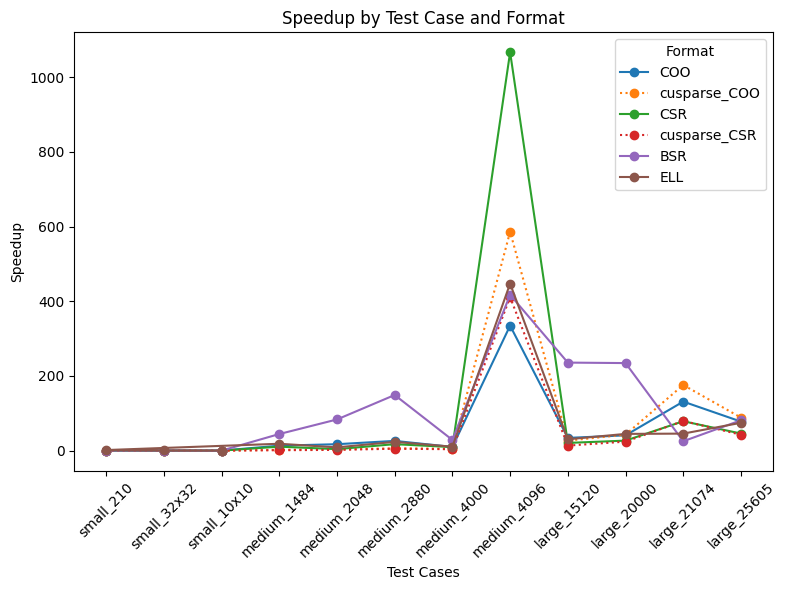

In [19]:
'''
our_best = ours.groupby(['testCase', 'format']).max(['speedup', 'numeric']).reset_index().sort_values(by='numeric')
cuSparse_best = cuSparse.groupby(['testCase', 'format']).max(['speedup', 'numeric']).reset_index().sort_values(by='numeric')
our_best = our_best[['testCase', 'format', 'speedup']]
cuSparse_best = cuSparse_best[['testCase', 'format', 'speedup']]
'''

temp = our_bests.copy(deep=True)
cusparse_temp = cusparse.copy(deep=True)

plt.figure(figsize=(8, 6))
for fmt in temp["format"].unique():
    subset = temp[temp["format"] == fmt]
    plt.plot(subset["testCase"], subset["speedup"], marker="o", label=fmt)
    
    subset = cusparse_temp[cusparse_temp["format"] == fmt]
    if len(subset):
        plt.plot(subset["testCase"], subset["speedup"], marker="o", label=f'cusparse_{fmt}', ls=':')

# Customize plot
plt.xlabel("Test Cases")
plt.ylabel("Speedup")
plt.title("Speedup by Test Case and Format")
plt.legend(title="Format")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("speedup_by_test_format.png")

# Show plot
plt.show()

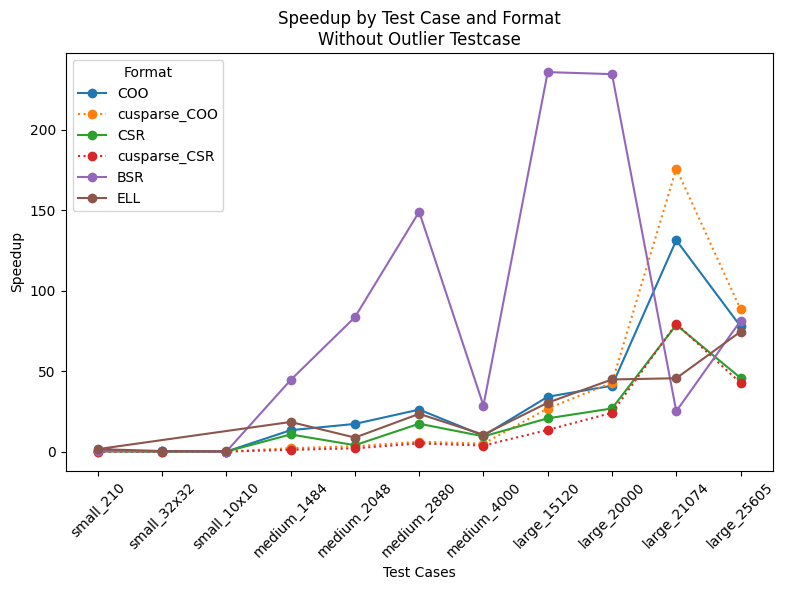

In [20]:
temp = our_bests.copy(deep=True)
cusparse_temp = cusparse.copy(deep=True)

temp = temp[temp['testCase'] != 'medium_4096']
cusparse_temp = cusparse_temp[cusparse_temp['testCase'] != 'medium_4096']

plt.figure(figsize=(8, 6))
for fmt in temp["format"].unique():
    subset = temp[temp["format"] == fmt]
    plt.plot(subset["testCase"], subset["speedup"], marker="o", label=fmt)
    
    subset = cusparse_temp[cusparse_temp["format"] == fmt]
    if len(subset):
        plt.plot(subset["testCase"], subset["speedup"], marker="o", label=f'cusparse_{fmt}', ls=':')

# Customize plot
plt.xlabel("Test Cases")
plt.ylabel("Speedup")
plt.title("Speedup by Test Case and Format\nWithout Outlier Testcase")
plt.legend(title="Format")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("speedup_by_test_format_no4096.png")

# Show plot
plt.show()

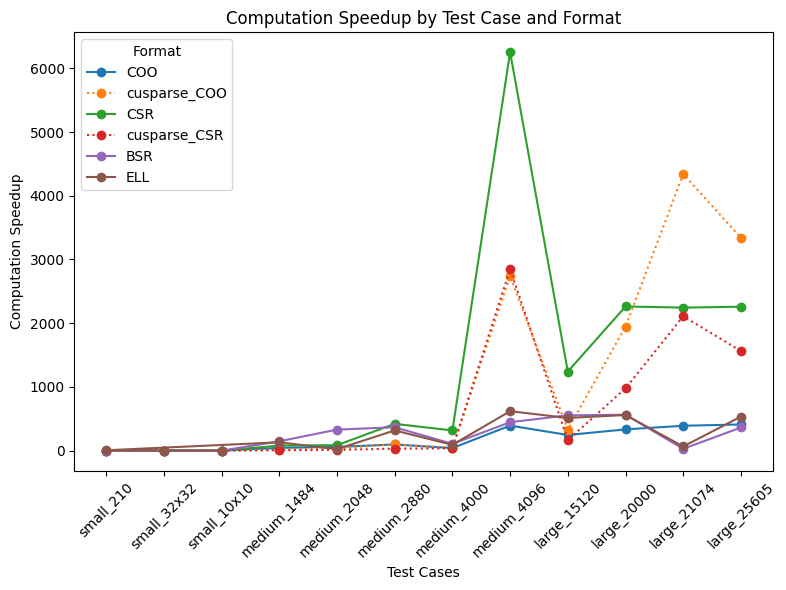

In [21]:

temp = our_bests.copy(deep=True)
cusparse_temp = cusparse.copy(deep=True)

plt.figure(figsize=(8, 6))
for fmt in temp["format"].unique():
    subset = temp[temp["format"] == fmt]
    plt.plot(subset["testCase"], subset["computation_speedup"], marker="o", label=fmt)
    
    subset = cusparse_temp[cusparse_temp["format"] == fmt]
    if len(subset):
        plt.plot(subset["testCase"], subset["computation_speedup"], marker="o", label=f'cusparse_{fmt}', ls=':')

# Customize plot
plt.xlabel("Test Cases")
plt.ylabel("Computation Speedup")
plt.title("Computation Speedup by Test Case and Format")
plt.legend(title="Format")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("compspeedup_by_test_format.png")

# Show plot
plt.show()

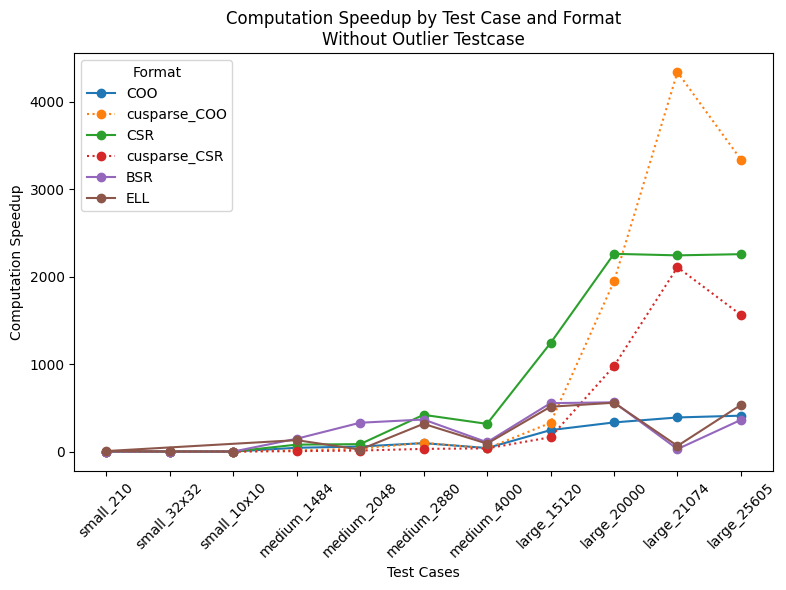

In [22]:
temp = our_bests.copy(deep=True)
cusparse_temp = cusparse.copy(deep=True)

temp = temp[temp['testCase'] != 'medium_4096']
cusparse_temp = cusparse_temp[cusparse_temp['testCase'] != 'medium_4096']

plt.figure(figsize=(8, 6))
for fmt in temp["format"].unique():
    subset = temp[temp["format"] == fmt]
    plt.plot(subset["testCase"], subset["computation_speedup"], marker="o", label=fmt)
    
    subset = cusparse_temp[cusparse_temp["format"] == fmt]
    if len(subset):
        plt.plot(subset["testCase"], subset["computation_speedup"], marker="o", label=f'cusparse_{fmt}', ls=':')

# Customize plot
plt.xlabel("Test Cases")
plt.ylabel("Computation Speedup")
plt.title("Computation Speedup by Test Case and Format\nWithout Outlier Testcase")
plt.legend(title="Format")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("compspeedup_by_test_format_no4096.png")

# Show plot
plt.show()

### Runtime

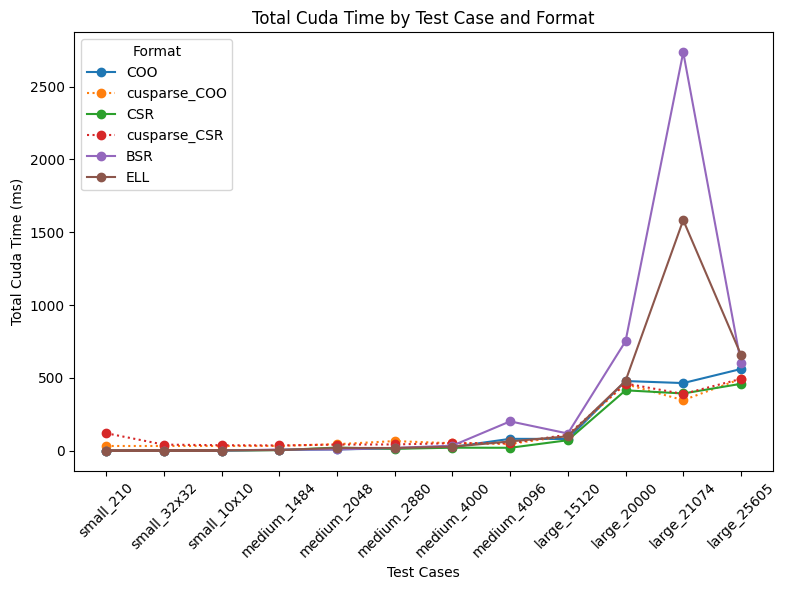

In [23]:
temp = our_bests.copy(deep=True)
cusparse_temp = cusparse.copy(deep=True)


plt.figure(figsize=(8, 6))
for fmt in temp["format"].unique():
    subset = temp[temp["format"] == fmt]
    plt.plot(subset["testCase"], subset["cudaTotalTimeMs"], marker="o", label=fmt)
    
    subset = cusparse_temp[cusparse_temp["format"] == fmt]
    if len(subset):
        plt.plot(subset["testCase"], subset["cudaTotalTimeMs"], marker="o", label=f'cusparse_{fmt}', ls=':')

# Customize plot
plt.xlabel("Test Cases")
plt.ylabel("Total Cuda Time (ms)")
plt.title("Total Cuda Time by Test Case and Format")
plt.legend(title="Format")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("time_by_test_format.png")

# Show plot
plt.show()

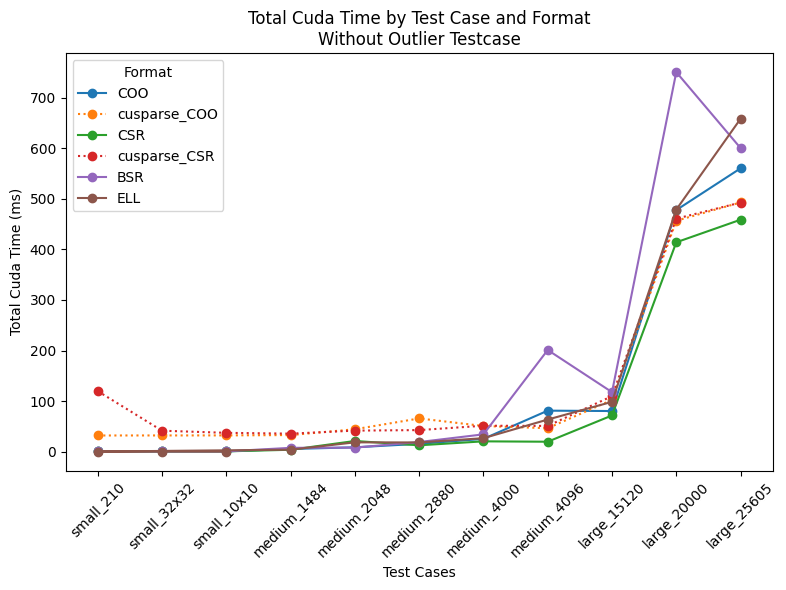

In [24]:
temp = our_bests.copy(deep=True)
cusparse_temp = cusparse.copy(deep=True)


temp = temp[temp['testCase'] != 'large_21074']
cusparse_temp = cusparse_temp[cusparse_temp['testCase'] != 'large_21074']

plt.figure(figsize=(8, 6))
for fmt in temp["format"].unique():
    subset = temp[temp["format"] == fmt]
    plt.plot(subset["testCase"], subset["cudaTotalTimeMs"], marker="o", label=fmt)
    
    subset = cusparse_temp[cusparse_temp["format"] == fmt]
    if len(subset):
        plt.plot(subset["testCase"], subset["cudaTotalTimeMs"], marker="o", label=f'cusparse_{fmt}', ls=':')

# Customize plot
plt.xlabel("Test Cases")
plt.ylabel("Total Cuda Time (ms)")
plt.title("Total Cuda Time by Test Case and Format\nWithout Outlier Testcase")
plt.legend(title="Format")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("time_by_test_format_no21074.png")

# Show plot
plt.show()

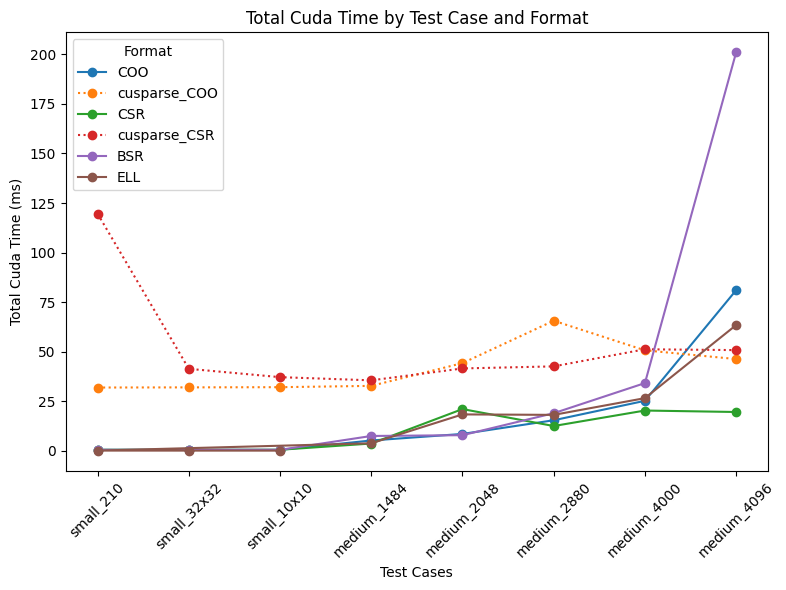

In [25]:
temp = our_bests.copy(deep=True)
cusparse_temp = cusparse.copy(deep=True)

temp = temp[~temp['testCase'].isin(['large_15120', 'large_20000', 'large_21074', 'large_25605'])]
cusparse_temp = cusparse_temp[~cusparse_temp['testCase'].isin(['large_15120', 'large_20000', 'large_21074', 'large_25605'])]

plt.figure(figsize=(8, 6))
for fmt in temp["format"].unique():
    subset = temp[temp["format"] == fmt]
    plt.plot(subset["testCase"], subset["cudaTotalTimeMs"], marker="o", label=fmt)
    
    subset = cusparse_temp[cusparse_temp["format"] == fmt]
    if len(subset):
        plt.plot(subset["testCase"], subset["cudaTotalTimeMs"], marker="o", label=f'cusparse_{fmt}', ls=':')

# Customize plot
plt.xlabel("Test Cases")
plt.ylabel("Total Cuda Time (ms)")
plt.title("Total Cuda Time by Test Case and Format")
plt.legend(title="Format")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("time_by_test_format.png")

# Show plot
plt.show()

### sparsity

In [26]:
sparsity = pd.read_json('sparsity.json')

cusparse = sparsity[sparsity['kernelType'] == -1]
ours = sparsity[sparsity['kernelType'] != -1]

cusparse['cudaKernelTimeMs'] = cusparse['cudaKernelTimeMs'] + cusparse['cudaEpilogTimeMs']

epilogue = ours[ours['denseOrdering'] == 'ROW_MAJOR']
epilogue = epilogue.groupby(['testcase', 'format'])['cudaEpilogTimeMs'].mean().reset_index()
cusparse.drop(columns = ['cudaEpilogTimeMs'], inplace=True)
cusparse_new = pd.merge(cusparse, epilogue, on=['testcase', 'format'], how='left')

cusparse_new['cudaTotalTimeMs'] = cusparse_new['cudaTotalTimeMs'] + cusparse_new['cudaEpilogTimeMs'] 


sparsity = pd.concat([ours, cusparse_new])

sparsity['speedup'] = sparsity['sequentialTimeMs'] / sparsity['cudaTotalTimeMs']
sparsity['computation_speedup'] = sparsity['sequentialTimeMs'] / sparsity['cudaKernelTimeMs']

ours = sparsity[sparsity['kernelType'] != -1]
cuSparse = sparsity[sparsity['kernelType'] == -1]

sparsity

C:\Users\Katel\AppData\Local\Temp\ipykernel_52944\2715511190.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cusparse['cudaKernelTimeMs'] = cusparse['cudaKernelTimeMs'] + cusparse['cudaEpilogTimeMs']
C:\Users\Katel\AppData\Local\Temp\ipykernel_52944\2715511190.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cusparse.drop(columns = ['cudaEpilogTimeMs'], inplace=True)


,testcase,sparsity,format,kernelType,denseOrdering,correct,cudaPrologTimeMs,cudaKernelTimeMs,cudaEpilogTimeMs,cudaTotalTimeMs,sequentialTimeMs,speedup,computation_speedup
0,sp_0.1_2048x2048,0.1,CSR,1,ROW_MAJOR,1,1.057,0.969,2.858,4.884,1707.249,349.559582,1761.866873
2,sp_0.2_2048x2048,0.2,CSR,1,ROW_MAJOR,1,1.195,4.969,3.398,9.562,3417.534,357.407864,687.770980
4,sp_0.3_2048x2048,0.3,CSR,1,ROW_MAJOR,1,1.270,1.520,3.544,6.334,5278.443,833.350647,3472.659868
6,sp_0.4_2048x2048,0.4,CSR,1,ROW_MAJOR,1,1.333,3.983,3.057,8.373,7745.349,925.038696,1944.601808
8,sp_0.5_2048x2048,0.5,CSR,1,ROW_MAJOR,1,16.443,2.089,2.901,21.433,10042.992,468.576121,4807.559598
10,sp_0.6_2048x2048,0.6,CSR,1,ROW_MAJOR,1,1.458,2.401,3.078,6.937,12920.922,1862.609485,5381.475219
12,sp_0.7_2048x2048,0.7,CSR,1,ROW_MAJOR,1,1.522,2.649,3.078,7.249,14978.217,2066.245965,5654.291053
14,sp_0.8_2048x2048,0.8,CSR,1,ROW_MAJOR,1,1.568,3.001,7.739,12.308,16796.998,1364.721969,5597.133622
16,sp_0.9_2048x2048,0.9,CSR,1,ROW_MAJOR,1,1.638,3.210,3.084,7.932,18067.974,2277.858548,5628.652336
18,sp_0.1_2048x2048,0.1,COO,1,ROW_MAJOR,0,1.176,8.547,2.901,12.624,3057.222,242.175380,357.695332


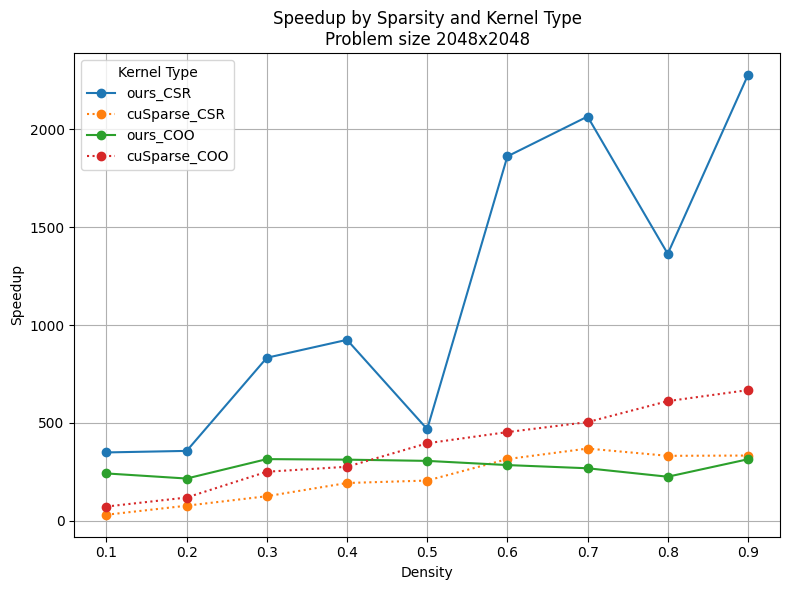

In [27]:
plt.figure(figsize=(8, 6))

for fmt in sparsity["format"].unique():
    subset = ours[ours["format"] == fmt]
    plt.plot(subset["sparsity"], subset["speedup"], marker="o", label=f'ours_{fmt}')
    
    subset = cuSparse[cuSparse["format"] == fmt]
    plt.plot(subset["sparsity"], subset["speedup"], marker="o", label=f'cuSparse_{fmt}', ls=':')

# Customize plot
plt.xlabel("Density")
plt.ylabel("Speedup")
plt.title("Speedup by Sparsity and Kernel Type\nProblem size 2048x2048")
plt.legend(title="Kernel Type")
plt.grid(True)
plt.tight_layout()
plt.savefig('sparsity_speedup.png')

# Show plot
plt.show()

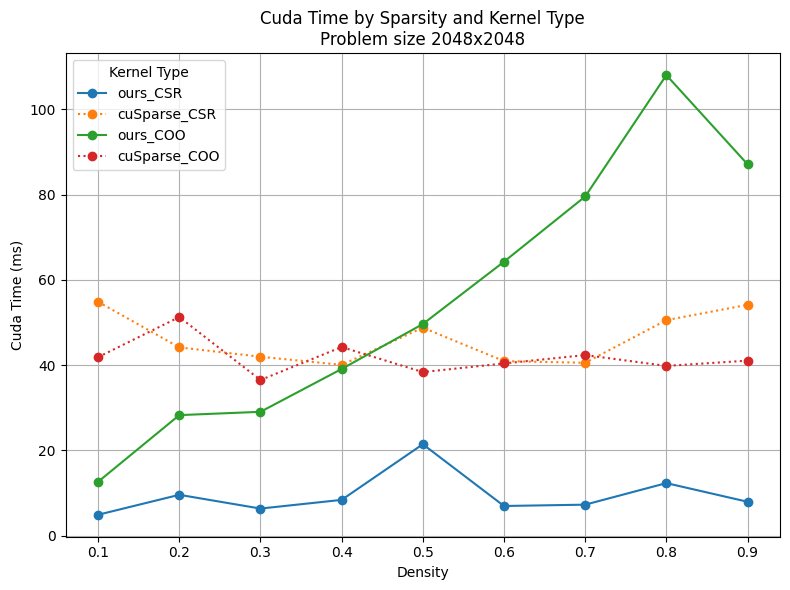

In [28]:
plt.figure(figsize=(8, 6))

for fmt in sparsity["format"].unique():
    subset = ours[ours["format"] == fmt]
    plt.plot(subset["sparsity"], subset["cudaTotalTimeMs"], marker="o", label=f'ours_{fmt}')
    
    subset = cuSparse[cuSparse["format"] == fmt]
    plt.plot(subset["sparsity"], subset["cudaTotalTimeMs"], marker="o", label=f'cuSparse_{fmt}', ls=':')

# Customize plot
plt.xlabel("Density")
plt.ylabel("Cuda Time (ms)")
plt.title("Cuda Time by Sparsity and Kernel Type\nProblem size 2048x2048")
plt.legend(title="Kernel Type")
plt.grid(True)
plt.tight_layout()
plt.savefig('sparsity_time.png')

# Show plot
plt.show()